In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import temporian as tp

In [2]:
max_id_per_group = [8, 9, 11]

machines = [f"machine-{group}-{id}" for group, max_id in zip(range(1, 4), max_id_per_group) for id in range(1, max_id + 1)]

machines

['machine-1-1',
 'machine-1-2',
 'machine-1-3',
 'machine-1-4',
 'machine-1-5',
 'machine-1-6',
 'machine-1-7',
 'machine-1-8',
 'machine-2-1',
 'machine-2-2',
 'machine-2-3',
 'machine-2-4',
 'machine-2-5',
 'machine-2-6',
 'machine-2-7',
 'machine-2-8',
 'machine-2-9',
 'machine-3-1',
 'machine-3-2',
 'machine-3-3',
 'machine-3-4',
 'machine-3-5',
 'machine-3-6',
 'machine-3-7',
 'machine-3-8',
 'machine-3-9',
 'machine-3-10',
 'machine-3-11']

In [3]:
data_dir = Path("tmp/temporian_server_machine_dataset")

data_dir.mkdir(parents=True, exist_ok=True)

DATA = "data.csv"
LABELS = "labels.csv"

for machine in machines:
    print(f"Downloading data for {machine}")
    
    dir = data_dir / machine
    dir.mkdir(exist_ok=True)
    
    data_path = dir / DATA
    if not data_path.exists():
        os.system(f"wget -q -O {data_path} https://raw.githubusercontent.com/NetManAIOps/OmniAnomaly/master/ServerMachineDataset/test/{machine}.txt")

    labels_path = dir / LABELS
    if not labels_path.exists():
        os.system(f"wget -q -O {labels_path} https://raw.githubusercontent.com/NetManAIOps/OmniAnomaly/master/ServerMachineDataset/test_label/{machine}.txt")

In [4]:
dfs = []

for machine in machines:
    dir = data_dir / machine
    df = pd.read_csv(dir / DATA, header=None)
    labels = pd.read_csv(dir/ LABELS, header=None)
    df = df.assign(label=labels)
    df["group"] = machine[8]
    df["machine"] = machine
    # Use index as timestamps column
    df = df.reset_index(drop=False, names="timestamp")
    df.columns = df.columns.astype(str)
    print(f"Events in {machine}: {len(df)}")
    dfs.append(df)

df = pd.concat(dfs)
df.head()

Events in machine-1-1: 28479
Events in machine-1-2: 23694
Events in machine-1-3: 23703
Events in machine-1-4: 23707
Events in machine-1-5: 23706
Events in machine-1-6: 23689
Events in machine-1-7: 23697
Events in machine-1-8: 23699
Events in machine-2-1: 23694
Events in machine-2-2: 23700
Events in machine-2-3: 23689
Events in machine-2-4: 23689
Events in machine-2-5: 23689
Events in machine-2-6: 28743
Events in machine-2-7: 23696
Events in machine-2-8: 23703
Events in machine-2-9: 28722
Events in machine-3-1: 28700
Events in machine-3-2: 23703
Events in machine-3-3: 23703
Events in machine-3-4: 23687
Events in machine-3-5: 23691
Events in machine-3-6: 28726
Events in machine-3-7: 28705
Events in machine-3-8: 28704
Events in machine-3-9: 28713
Events in machine-3-10: 23693
Events in machine-3-11: 28696


,timestamp,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,label,group,machine
0,0,0.075269,0.065678,0.070234,0.074332,0.0,0.933333,0.274011,0.0,0.031081,...,0.048893,0.000386,0.000034,0.064432,0.064500,0.0,0.0,0,1,machine-1-1
1,1,0.086022,0.080508,0.075808,0.076655,0.0,0.930769,0.274953,0.0,0.031081,...,0.050437,0.000386,0.000022,0.065228,0.065224,0.0,0.0,0,1,machine-1-1
2,2,0.075269,0.064619,0.071349,0.074332,0.0,0.928205,0.274953,0.0,0.030940,...,0.055069,0.000386,0.000045,0.067111,0.067178,0.0,0.0,0,1,machine-1-1
3,3,0.086022,0.048729,0.063545,0.070848,0.0,0.928205,0.273070,0.0,0.027250,...,0.051467,0.000000,0.000034,0.066676,0.066744,0.0,0.0,0,1,machine-1-1
4,4,0.086022,0.051907,0.062430,0.070848,0.0,0.933333,0.274011,0.0,0.030940,...,0.051467,0.000386,0.000022,0.066604,0.066671,0.0,0.0,0,1,machine-1-1


In [5]:
df.describe()

,timestamp,0,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,label
count,708420.000000,708420.000000,708420.000000,708420.000000,708420.000000,708420.000000,708420.000000,708420.000000,708420.0,708420.000000,...,708420.000000,708420.000000,708420.000000,708420.000000,708420.000000,708420.000000,708420.000000,708420.000000,708420.000000,708420.000000
mean,12757.271575,0.160686,0.086226,0.098888,0.113795,0.238911,0.712696,0.393758,0.0,0.024270,...,0.121081,0.208342,0.113507,0.039236,0.054533,0.223638,0.220811,0.018056,0.010181,0.041563
std,7495.191084,0.161099,0.125249,0.141293,0.163208,0.399149,0.286226,0.299432,0.0,0.058701,...,0.183360,0.191475,0.152171,0.086949,0.109251,0.218597,0.220283,0.076995,0.063242,0.199588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6325.000000,0.040404,0.003553,0.004760,0.005961,0.000000,0.492630,0.124229,0.0,0.000178,...,0.001005,0.051437,0.000362,0.000000,0.004537,0.041667,0.040404,0.000000,0.000000,0.000000
50%,12650.000000,0.103093,0.029312,0.036170,0.041291,0.000000,0.803033,0.329559,0.0,0.004336,...,0.027397,0.153205,0.061760,0.000000,0.016854,0.154545,0.146646,0.000000,0.000000,0.000000
75%,18975.000000,0.247423,0.121539,0.134453,0.148537,0.433962,0.985549,0.570502,0.0,0.021812,...,0.200000,0.325357,0.158607,0.023256,0.046443,0.350322,0.348993,0.000000,0.000000,0.000000
max,28742.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
tp.config.max_display_features = 100
tp.config.max_display_events = 5

evset = tp.from_pandas(df, indexes=["group", "machine"])
evset

timestamp,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,label
0,0.07527,0.06568,0.07023,0.07433,0,0.9333,0.274,0,0.03108,0,0.1341,0.08108,0.0274,0.06781,0.1258,0.1506,0,0,0.122,0.09198,0.09396,0.07415,0.9354,0.01808,0.03201,0.01658,0,0.0777,0,0.008596,0.06804,0.04889,0.000386,3.4e-05,0.06443,0.0645,0,0,0
1,0.08602,0.08051,0.07581,0.07666,0,0.9308,0.275,0,0.03108,0.000122,0.1488,0.1622,0.0548,0.0714,0.1231,0.1645,0,0,0.1214,0.09416,0.09616,0.07648,0.9966,0.01603,0.03358,0.01473,0,0.0794,0,0.008596,0.07002,0.05044,0.000386,2.2e-05,0.06523,0.06522,0,0,0
2,0.07527,0.06462,0.07135,0.07433,0,0.9282,0.275,0,0.03094,0.000366,0.1348,0.09459,0.0274,0.06328,0.129,0.1515,0,0,0.1154,0.09012,0.09594,0.07575,0.9603,0.01176,0.03358,0.01092,0,0.07953,0,0.008596,0.06968,0.05507,0.000386,4.5e-05,0.06711,0.06718,0,0,0
3,0.08602,0.04873,0.06355,0.07085,0,0.9282,0.2731,0,0.02725,0.000244,0.1313,0.08108,0.0274,0.06784,0.1104,0.1456,0,0,0.1351,0.09738,0.1014,0.08018,0.9615,0.01606,0.03603,0.01468,0,0.08343,0,0.01003,0.07325,0.05147,0,3.4e-05,0.06668,0.06674,0,0,0
4,0.08602,0.05191,0.06243,0.07085,0,0.9333,0.274,0,0.03094,0.000244,0.1027,0.1081,0.0411,0.07565,0.1191,0.1184,0,0,0.1274,0.09449,0.09817,0.07752,0.9422,0.0184,0.03411,0.01696,0,0.08093,0,0.008596,0.07093,0.05147,0.000386,2.2e-05,0.0666,0.06667,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
timestamp,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,label
0,0.23,0.1095,0.1266,0.1338,0.2264,0.621,0.4093,0,9.3e-05,1.5e-05,0,0.00722,0,0.03696,0.003551,0.02929,0,0,0.002313,0.0108,0.005868,0.04877,0.07143,0.08159,0.2,0.07692,0,0.01994,0,0,0.04801,0,0,0.0625,0,0,0,0,0
1,0.25,0.1089,0.1271,0.134,0.2264,0.5473,0.337,0,9.3e-05,1.5e-05,0,0.009025,0,0.03926,0.004129,0.03305,0,0,0.01261,0.02618,0.01733,0.0752,0.1071,0.159,0.2,0.1538,0,0.03768,0,0,0.07518,0,0,0.05556,0,0.5,0,0,0
2,0.24,0.1228,0.1308,0.1353,0.2264,0.4784,0.2648,0,0.000653,0.000134,8e-06,0.01805,0,0.09858,0.009166,0.09242,0,0,0.1534,0.02637,0.1565,0.2137,0,0.159,0.2,0.1581,0,0.1788,0,0,0.2129,0,0,0.06944,0,0,0,0,0


The number of plots (1092) is larger than "options.max_num_plots=38". Only the first plots will be printed.


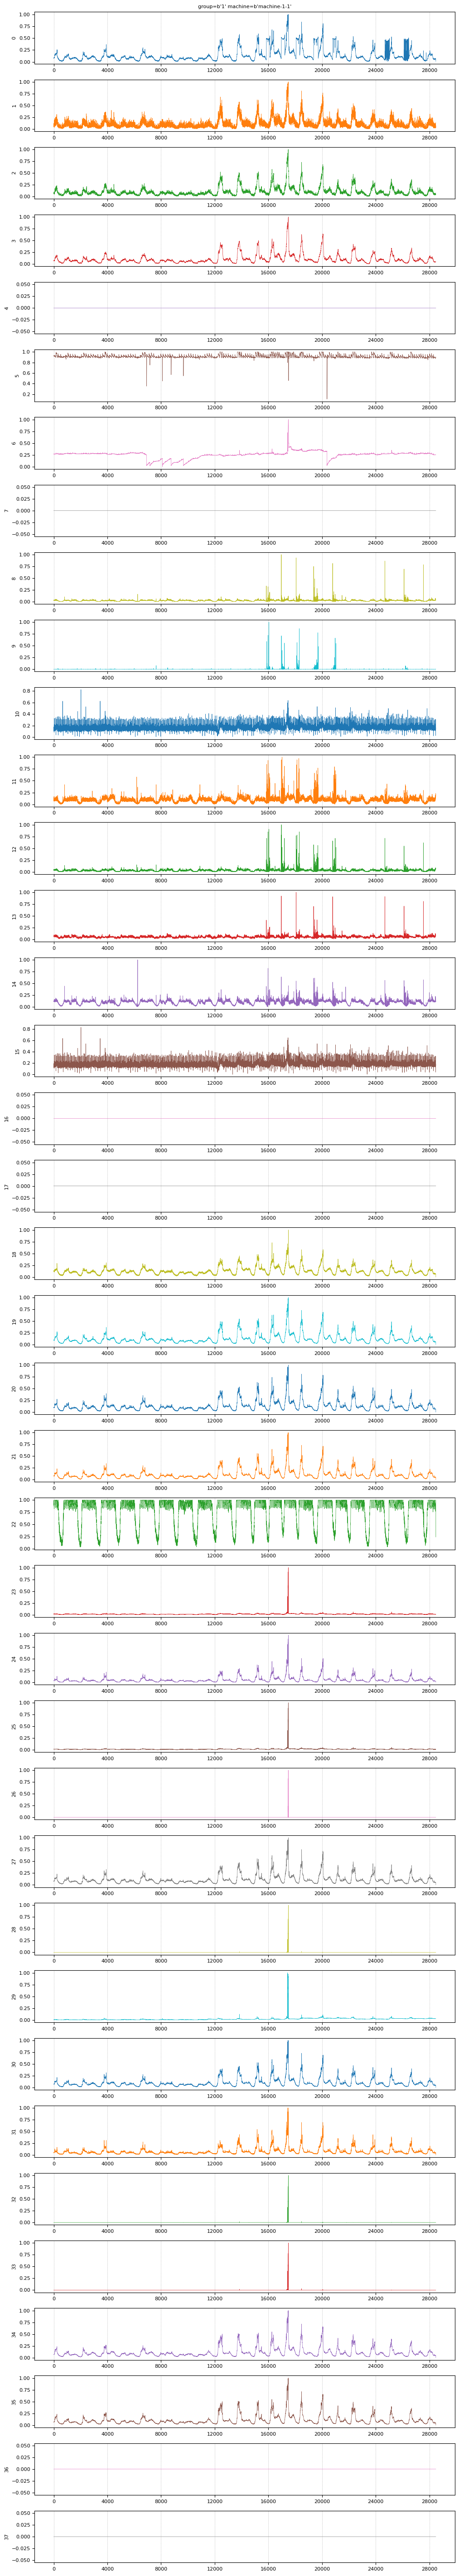

In [7]:
evset.plot(max_num_plots=38)

In [8]:
feature_names = evset.schema.feature_names()
feature_names.remove('label')

raw_features = evset[feature_names]
labels = evset[['label']]

print("Raw features:", raw_features.schema)
print("Labels:", labels.schema)

Raw features: features: [('0', float64), ('1', float64), ('2', float64), ('3', float64), ('4', float64), ('5', float64), ('6', float64), ('7', float64), ('8', float64), ('9', float64), ('10', float64), ('11', float64), ('12', float64), ('13', float64), ('14', float64), ('15', float64), ('16', float64), ('17', float64), ('18', float64), ('19', float64), ('20', float64), ('21', float64), ('22', float64), ('23', float64), ('24', float64), ('25', float64), ('26', float64), ('27', float64), ('28', float64), ('29', float64), ('30', float64), ('31', float64), ('32', float64), ('33', float64), ('34', float64), ('35', float64), ('36', float64), ('37', float64)]
indexes: [('group', str_), ('machine', str_)]
is_unix_timestamp: False

Labels: features: [('label', int64)]
indexes: [('group', str_), ('machine', str_)]
is_unix_timestamp: False



In [9]:
from sklearn.utils.class_weight import compute_class_weight

y = df["label"]
classes = y.unique()
class_weights = compute_class_weight('balanced', classes=classes, y=y)
class_weights = dict(zip(classes, class_weights))

print("Class weights:", class_weights)

Class weights: {0: 0.5216826515222924, 1: 12.02995516913463}


In [24]:
from sklearn.preprocessing import OneHotEncoder

last_train_timestamp = int(23700 * 0.8)

CATEGORICAL_COLS = ["group", "machine"]
DROP_COLS = CATEGORICAL_COLS + ["timestamp"]

def split(X, y):
    timestamp = X.timestamps()
    X_train = X.filter(timestamp <= last_train_timestamp)
    X_test = X.filter(timestamp > last_train_timestamp)
    y_train = y.filter(timestamp <= last_train_timestamp)
    y_test = y.filter(timestamp > last_train_timestamp)
    
    # encoder = OneHotEncoder(sparse_output=False)
    
    X_train = tp.to_pandas(X_train).fillna(-1)
    # train_encoded = encoder.fit_transform(X_train[CATEGORICAL_COLS])
    X_train = X_train.drop(columns=DROP_COLS)
    # X_train = np.concatenate([X_train.to_numpy(), train_encoded], axis=1)
    
    X_test = tp.to_pandas(X_test).fillna(-1)
    # test_encoded = encoder.transform(X_test[CATEGORICAL_COLS])
    X_test = X_test.drop(columns=DROP_COLS)
    # X_test = np.concatenate([X_test.to_numpy(), test_encoded], axis=1)
    
    y_train = tp.to_pandas(y_train).drop(columns=DROP_COLS).squeeze()
    y_test = tp.to_pandas(y_test).drop(columns=DROP_COLS).squeeze()

    print("Number of samples in train set", len(X_train))
    print("Number of positive (anomalous) samples in train set", y_train.sum())
    print("Number of samples in test set", len(X_test))
    print("Number of positive (anomalous) samples in test set", y_test.sum())

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split(raw_features, labels)

Number of samples in train set 530908
Number of positive (anomalous) samples in train set 19942
Number of samples in test set 177512
Number of positive (anomalous) samples in test set 9502


In [25]:
from sklearn.neural_network import MLPClassifier

def train(X_train, y_train):
    model = MLPClassifier(hidden_layer_sizes=(128, 16), tol=0.001, n_iter_no_change=3, batch_size=512, verbose=True, learning_rate='adaptive', learning_rate_init=0.0001)
    model.fit(X_train, y_train)

    return model

model = train(X_train, y_train)

Iteration 1, loss = 0.20697254
Iteration 2, loss = 0.14393205
Iteration 3, loss = 0.13113304
Iteration 4, loss = 0.12037733
Iteration 5, loss = 0.11273210
Iteration 6, loss = 0.10729180
Iteration 7, loss = 0.10296547
Iteration 8, loss = 0.09926796
Iteration 9, loss = 0.09621354
Iteration 10, loss = 0.09366095
Iteration 11, loss = 0.09146893
Iteration 12, loss = 0.08958588
Iteration 13, loss = 0.08791607
Iteration 14, loss = 0.08650157
Iteration 15, loss = 0.08516418
Iteration 16, loss = 0.08402489
Iteration 17, loss = 0.08291118
Iteration 18, loss = 0.08199208
Iteration 19, loss = 0.08106764
Iteration 20, loss = 0.08024554
Iteration 21, loss = 0.07946225
Training loss did not improve more than tol=0.001000 for 3 consecutive epochs. Stopping.


Train score: 0.7272284870286396
Test score: 0.7361158132727628
Train predictions


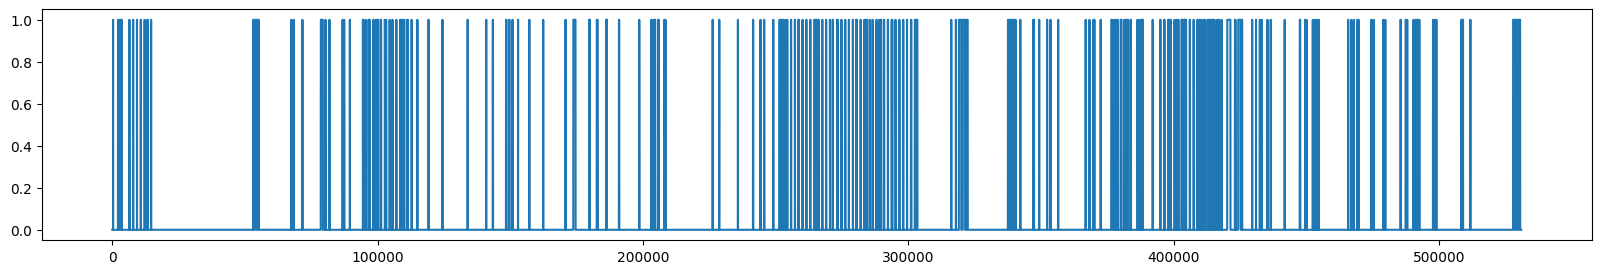

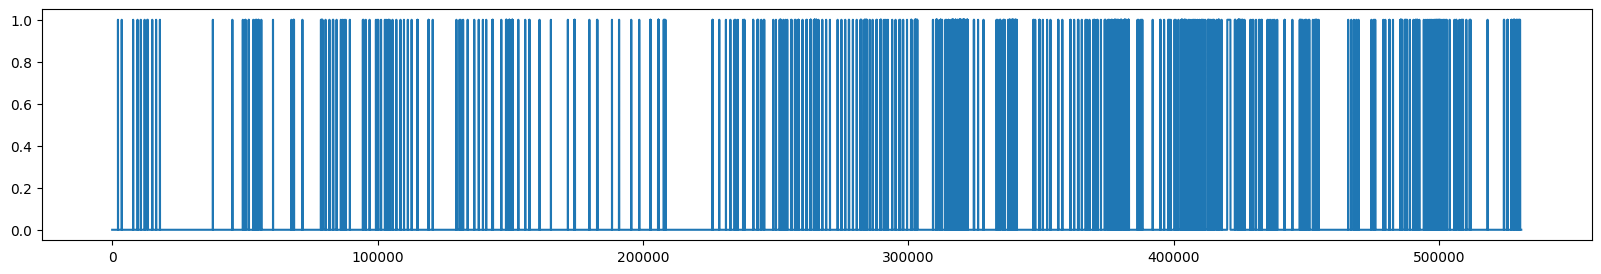

Test predictions


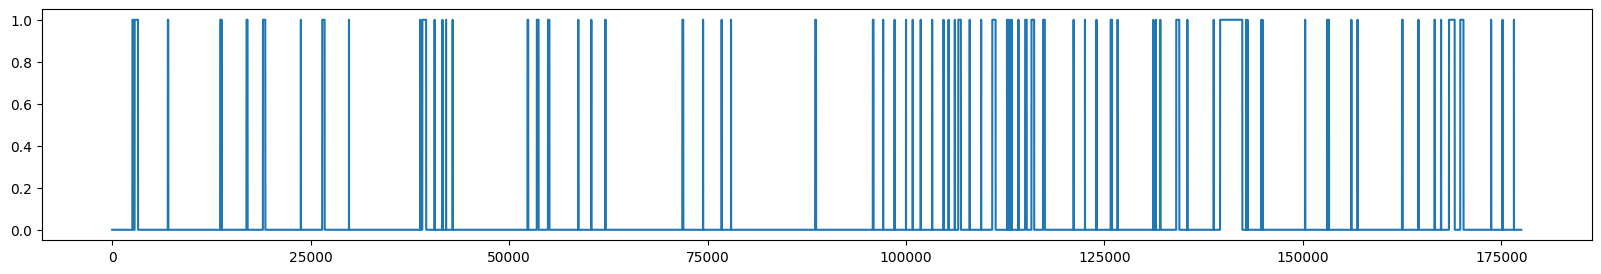

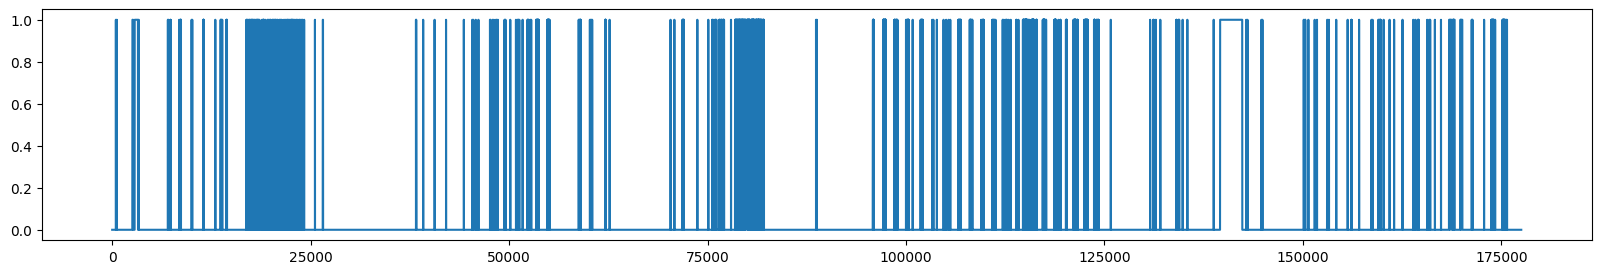

In [26]:
from sklearn.utils.class_weight import compute_sample_weight

figsize=(20,3)

def eval(model, X_train, y_train, X_test, y_test):
    train_sample_weights = compute_sample_weight(class_weights, y_train)
    print("Train score:", model.score(X_train, y_train, sample_weight=train_sample_weights))

    test_sample_weights = compute_sample_weight(class_weights, y_test)
    print("Test score:", model.score(X_test, y_test, sample_weight=test_sample_weights))

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    print("Train predictions")
    y_train.plot(figsize=figsize)
    plt.show()
    pd.Series(train_preds).plot(figsize=figsize)
    plt.show()
    
    print("Test predictions")
    y_test.plot(figsize=figsize)
    plt.show()
    pd.Series(test_preds).plot(figsize=figsize)
    plt.show()

eval(model, X_train, y_train, X_test, y_test)

In [27]:
lag_features = []

for window in range(1, 10):
    lag_features.append(raw_features.lag(window).resample(raw_features).prefix(f"lag_{window}_"))

features = tp.glue(raw_features, *lag_features)
features

timestamp,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,lag_1_0,lag_1_1,lag_1_2,lag_1_3,lag_1_4,lag_1_5,lag_1_6,lag_1_7,lag_1_8,lag_1_9,lag_1_10,lag_1_11,lag_1_12,lag_1_13,lag_1_14,lag_1_15,lag_1_16,lag_1_17,lag_1_18,lag_1_19,lag_1_20,lag_1_21,lag_1_22,lag_1_23,lag_1_24,lag_1_25,lag_1_26,lag_1_27,lag_1_28,lag_1_29,lag_1_30,lag_1_31,lag_1_32,lag_1_33,lag_1_34,lag_1_35,lag_1_36,lag_1_37,lag_2_0,lag_2_1,lag_2_2,lag_2_3,lag_2_4,lag_2_5,lag_2_6,lag_2_7,lag_2_8,lag_2_9,lag_2_10,lag_2_11,lag_2_12,lag_2_13,lag_2_14,lag_2_15,lag_2_16,lag_2_17,lag_2_18,lag_2_19,lag_2_20,lag_2_21,lag_2_22,lag_2_23,…
0,0.07527,0.06568,0.07023,0.07433,0,0.9333,0.274,0,0.03108,0,0.1341,0.08108,0.0274,0.06781,0.1258,0.1506,0,0,0.122,0.09198,0.09396,0.07415,0.9354,0.01808,0.03201,0.01658,0,0.0777,0,0.008596,0.06804,0.04889,0.000386,3.4e-05,0.06443,0.0645,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,…
1,0.08602,0.08051,0.07581,0.07666,0,0.9308,0.275,0,0.03108,0.000122,0.1488,0.1622,0.0548,0.0714,0.1231,0.1645,0,0,0.1214,0.09416,0.09616,0.07648,0.9966,0.01603,0.03358,0.01473,0,0.0794,0,0.008596,0.07002,0.05044,0.000386,2.2e-05,0.06523,0.06522,0,0,0.07527,0.06568,0.07023,0.07433,0,0.9333,0.274,0,0.03108,0,0.1341,0.08108,0.0274,0.06781,0.1258,0.1506,0,0,0.122,0.09198,0.09396,0.07415,0.9354,0.01808,0.03201,0.01658,0,0.0777,0,0.008596,0.06804,0.04889,0.000386,3.4e-05,0.06443,0.0645,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,…
2,0.07527,0.06462,0.07135,0.07433,0,0.9282,0.275,0,0.03094,0.000366,0.1348,0.09459,0.0274,0.06328,0.129,0.1515,0,0,0.1154,0.09012,0.09594,0.07575,0.9603,0.01176,0.03358,0.01092,0,0.07953,0,0.008596,0.06968,0.05507,0.000386,4.5e-05,0.06711,0.06718,0,0,0.08602,0.08051,0.07581,0.07666,0,0.9308,0.275,0,0.03108,0.000122,0.1488,0.1622,0.0548,0.0714,0.1231,0.1645,0,0,0.1214,0.09416,0.09616,0.07648,0.9966,0.01603,0.03358,0.01473,0,0.0794,0,0.008596,0.07002,0.05044,0.000386,2.2e-05,0.06523,0.06522,0,0,0.07527,0.06568,0.07023,0.07433,0,0.9333,0.274,0,0.03108,0,0.1341,0.08108,0.0274,0.06781,0.1258,0.1506,0,0,0.122,0.09198,0.09396,0.07415,0.9354,0.01808,…
3,0.08602,0.04873,0.06355,0.07085,0,0.9282,0.2731,0,0.02725,0.000244,0.1313,0.08108,0.0274,0.06784,0.1104,0.1456,0,0,0.1351,0.09738,0.1014,0.08018,0.9615,0.01606,0.03603,0.01468,0,0.08343,0,0.01003,0.07325,0.05147,0,3.4e-05,0.06668,0.06674,0,0,0.07527,0.06462,0.07135,0.07433,0,0.9282,0.275,0,0.03094,0.000366,0.1348,0.09459,0.0274,0.06328,0.129,0.1515,0,0,0.1154,0.09012,0.09594,0.07575,0.9603,0.01176,0.03358,0.01092,0,0.07953,0,0.008596,0.06968,0.05507,0.000386,4.5e-05,0.06711,0.06718,0,0,0.08602,0.08051,0.07581,0.07666,0,0.9308,0.275,0,0.03108,0.000122,0.1488,0.1622,0.0548,0.0714,0.1231,0.1645,0,0,0.1214,0.09416,0.09616,0.07648,0.9966,0.01603,…
4,0.08602,0.05191,0.06243,0.07085,0,0.9333,0.274,0,0.03094,0.000244,0.1027,0.1081,0.0411,0.07565,0.1191,0.1184,0,0,0.1274,0.09449,0.09817,0.07752,0.9422,0.0184,0.03411,0.01696,0,0.08093,0,0.008596,0.07093,0.05147,0.000386,2.2e-05,0.0666,0.06667,0,0,0.08602,0.04873,0.06355,0.07085,0,0.9282,0.2731,0,0.02725,0.000244,0.1313,0.08108,0.0274,0.06784,0.1104,0.1456,0,0,0.1351,0.09738,0.1014,0.08018,0.9615,0.01606,0.03603,0.01468,0,0.08343,0,0.01003,0.07325,0.05147,0,3.4e-05,0.06668,0.06674,0,0,0.07527,0.06462,0.07135,0.07433,0,0.9282,0.275,0,0.03094,0.000366,0.1348,0.09459,0.0274,0.06328,0.129,0.1515,0,0,0.1154,0.09012,0.09594,0.07575,0.9603,0.01176,…
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
timestamp,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,3

In [ ]:
X_train, y_train, X_test, y_test = split(features, labels)
model = train(X_train, y_train)
eval(model, X_train, y_train, X_test, y_test)

Number of samples in train set 530908
Number of positive (anomalous) samples in train set 19942
Number of samples in test set 177512
Number of positive (anomalous) samples in test set 9502
Iteration 1, loss = 0.23731533
Iteration 2, loss = 0.14544917
Iteration 3, loss = 0.11638714
Iteration 4, loss = 0.09894571
Iteration 5, loss = 0.08981729
Iteration 6, loss = 0.08419084
Iteration 7, loss = 0.08019371
Iteration 8, loss = 0.07691982
Iteration 9, loss = 0.07409571
Iteration 10, loss = 0.07147458
Iteration 11, loss = 0.06933175
Iteration 12, loss = 0.06746509
Iteration 13, loss = 0.06568749
Iteration 14, loss = 0.06409585
Iteration 15, loss = 0.06285243
Iteration 16, loss = 0.06142169
Iteration 17, loss = 0.06039437
Iteration 18, loss = 0.05934592
Iteration 19, loss = 0.05838234


In [ ]:
moving_statistic_features = []

for window in [10, 50, 200, 1000]:
    moving_statistic_features.append(raw_features.simple_moving_average(window).prefix(f"sma_{window}_"))
    moving_statistic_features.append(raw_features.moving_standard_deviation(window).prefix(f"movstd_{window}_"))
    moving_statistic_features.append(raw_features.moving_max(window).prefix(f"movmax_{window}_"))

features = tp.glue(raw_features, *lag_features, *moving_statistic_features)
features

In [ ]:
X_train, y_train, X_test, y_test = split(features, labels)
model = train(X_train, y_train)
eval(model, X_train, y_train, X_test, y_test)